<a href="https://colab.research.google.com/github/Danila-programist/Numerical-methods/blob/main/ODE_BVP_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приближённое решение краевой задачи для обыкновенного дифференциального уравнения

Найти приближённое решение краевой задачи для обыкновенного дифференциального уравнения на отрезке $ [0, 1] $ cеточным методом на равномерной сетке. Для вычисления решения использовать метод прогонки. Для сравнения приведено точное решение $ u_{0}(x) $.



1. Написать функцию, реализующую метод прогонки (функция получает коэффициенты системы линейных уравнений, возвращает значения корней). Составить тестовую задачу для этой функции (СЛАУ), убедиться что реализация корректная.

In [11]:
import numpy as np

def thomas_algorithm(a, b, c, d):
    """
    Решение трехдиагональной системы уравнений методом прогонки (алгоритм Томаса)

    Параметры:
        a - нижняя диагональ (a[0] не используется)
        b - главная диагональ
        c - верхняя диагональ (c[-1] не используется)
        d - правые части уравнений

    Возвращает:
        x - решение системы
    """
    n = len(d)

    # Создаем копии массивов для прогоночных коэффициентов
    c_ = np.zeros(n-1)
    d_ = np.zeros(n)

    # Прямой ход
    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]

    for i in range(1, n-1):
        denominator = b[i] - a[i] * c_[i-1]
        c_[i] = c[i] / denominator
        d_[i] = (d[i] - a[i] * d_[i-1]) / denominator

    d_[-1] = (d[-1] - a[-1] * d_[-2]) / (b[-1] - a[-1] * c_[-1])

    # Обратный ход
    x = np.zeros(n)
    x[-1] = d_[-1]

    for i in range(n-2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i+1]

    return x

def solve_bvp(f, alpha, beta, N=100):
    """
    Решение краевой задачи для ОДУ -u'' + u = f(x) на [0,1]
    с граничными условиями u(0)=alpha, u(1)=beta

    Параметры:
        f - функция правой части
        alpha - левое граничное условие
        beta - правое граничное условие
        N - количество узлов сетки

    Возвращает:
        x - узлы сетки
        u - приближенное решение
    """
    h = 1.0 / (N - 1)
    x = np.linspace(0, 1, N)

    # Инициализация коэффициентов
    a = np.full(N, -1/h**2)  # нижняя диагональ
    b = np.full(N, 2/h**2 + 1)  # главная диагональ
    c = np.full(N, -1/h**2)  # верхняя диагональ
    d = np.array([f(xi) for xi in x])  # правая часть

    # Учет граничных условий
    # u(0) = alpha
    a[0] = 0
    b[0] = 1
    c[0] = 0
    d[0] = alpha

    # u(1) = beta
    a[-1] = 0
    b[-1] = 1
    c[-1] = 0
    d[-1] = beta

    # Решение системы
    u = thomas_algorithm(a, b, c, d)

    return x, u

# Тест метода прогонки
def test_thomas():
    expected = np.array([1, 2, 3, 4])
    a = np.array([0, -1, -1, -1], dtype=float)
    b = np.array([2, 2, 2, 2], dtype=float)
    c = np.array([-1, -1, -1, 0], dtype=float)

    # Вычисляем правую часть: A * expected
    d = np.zeros(4)
    d[0] = b[0]*expected[0] + c[0]*expected[1]
    d[1] = a[1]*expected[0] + b[1]*expected[1] + c[1]*expected[2]
    d[2] = a[2]*expected[1] + b[2]*expected[2] + c[2]*expected[3]
    d[3] = a[3]*expected[2] + b[3]*expected[3]

    result = thomas_algorithm(a, b, c, d)

    print("Ожидаемый результат:", expected)
    print("Полученный результат:", result)
    print("Норма ошибки:", np.linalg.norm(result - expected))
    assert np.allclose(result, expected), "Тест не пройден"
    print("Тест пройден успешно!\n")


# Пример использования
def example_bvp():
    # Точное решение: u(x) = sin(x)
    def u_exact(x):
        return np.sin(x)

    # Правая часть для -u'' + u = sin(x) + sin(x) = 2*sin(x)
    def f(x):
        return 2 * np.sin(x)

    alpha = 0  # u(0) = 0
    beta = np.sin(1)  # u(1) = sin(1)

    N = 100
    x, u = solve_bvp(f, alpha, beta, N)
    exact = u_exact(x)

    # Вычисление ошибки
    error = np.max(np.abs(u - exact))
    print(f"Пример решения краевой задачи (N={N}):")
    print(f"Максимальная ошибка: {error:.2e}")



# Запуск тестов
test_thomas()
example_bvp()

Ожидаемый результат: [1 2 3 4]
Полученный результат: [1. 2. 3. 4.]
Норма ошибки: 6.661338147750939e-16
Тест пройден успешно!

Пример решения краевой задачи (N=100):
Максимальная ошибка: 4.64e-07


2. Построить разностную схему для вашего ОДУ. Использовать разностные производные второго порядка точности

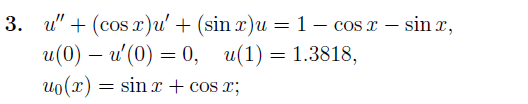

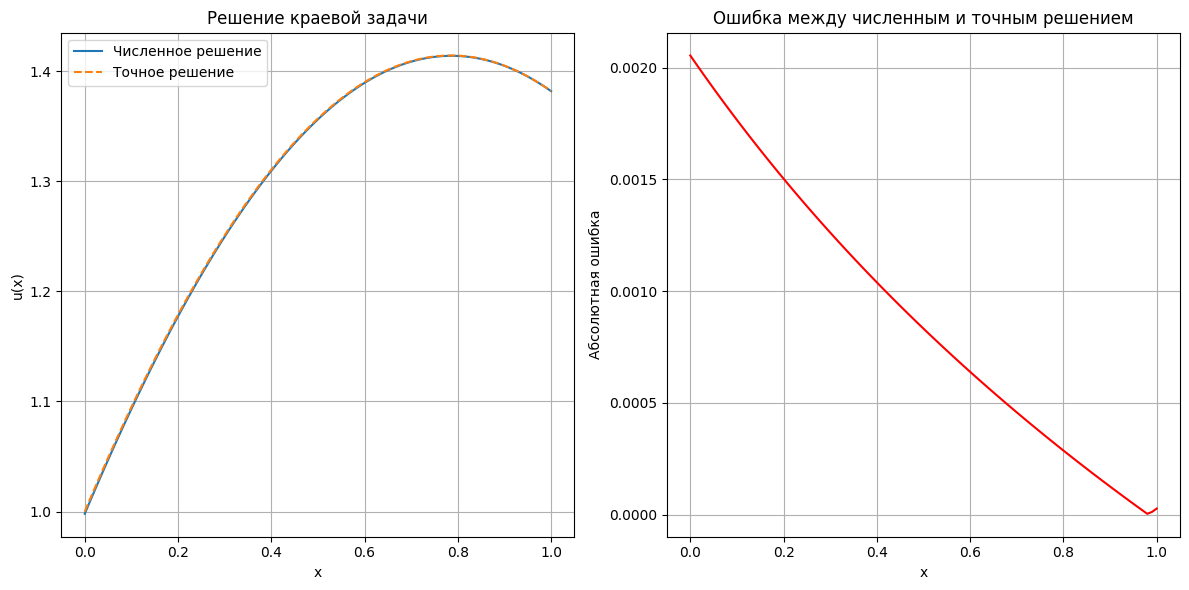

In [22]:
import numpy as np
import matplotlib.pyplot as plt


def solve_bvp(N=100):
    h = 1.0 / (N - 1)
    x = np.linspace(0, 1, N)

    a = np.zeros(N)
    b = np.zeros(N)
    c = np.zeros(N)
    d = np.zeros(N)

    for i in range(1, N - 1):
        xi = x[i]
        a[i] = 1 / h**2 - np.cos(xi) / (2 * h)
        b[i] = -2 / h**2 + np.sin(xi)
        c[i] = 1 / h**2 + np.cos(xi) / (2 * h)
        d[i] = 1 - np.cos(xi) - np.sin(xi)

    # Левое граничное условие: u(0) - u'(0) = 0
    a[0] = 0  # не используется
    b[0] = 1 + 1 / h  # изменено
    c[0] = -1 / h  # изменено
    d[0] = 0

    # Правое граничное условие: u(1) = 1.3818
    a[-1] = 0
    b[-1] = 1
    c[-1] = 0
    d[-1] = 1.3818

    u = thomas_algorithm(a, b, c, d)
    return x, u

def exact_solution(x):
    return np.sin(x) + np.cos(x)

# Решение
N = 100
x, u_numerical = solve_bvp(N)
u_exact = exact_solution(x)
error = np.abs(u_numerical - u_exact)

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, u_numerical, label='Численное решение')
plt.plot(x, u_exact, '--', label='Точное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, error, color='red')
plt.xlabel('x')
plt.ylabel('Абсолютная ошибка')
plt.title('Ошибка между численным и точным решением')
plt.grid()

plt.tight_layout()
plt.show()

3. Используя аппроксимацию граничных условий **первого** порядка точности, получить приближенное решение краевой задачи при $ N = 10, 20, 40, 80, 160 $, вычислить норму погрешности, используя точное решение. Аналогично, найдите норму погрешности приближенного решения при использовании аппроксимации граничных условий со **вторым** порядком точности. На одном рисунке изобразите графики зависимости погрешности от шага сетки (или от количества узлов) в логарифмическом масштабе. По полученным графикам проверьте корректность вашей программы.

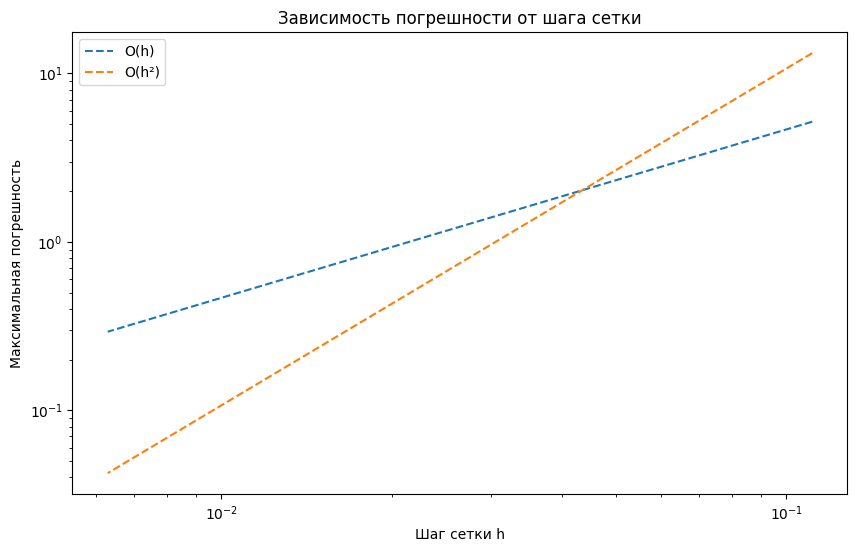

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def solve_bvp(N, order=2):
    """
    Решение краевой задачи с аппроксимацией граничных условий заданного порядка.
    order=1 - первый порядок, order=2 - второй порядок.
    """
    h = 1.0 / (N - 1)
    x = np.linspace(0, 1, N)

    # Инициализация коэффициентов
    a = np.zeros(N)  # нижняя диагональ
    b = np.zeros(N)  # главная диагональ
    c = np.zeros(N)  # верхняя диагональ
    d = np.zeros(N)  # правая часть

    # Коэффициенты для внутренних точек
    for i in range(1, N-1):
        xi = x[i]
        a[i] = 1/h**2 - np.cos(xi)/(2*h)
        b[i] = -2/h**2 + np.sin(xi)
        c[i] = 1/h**2 + np.cos(xi)/(2*h)
        d[i] = 1 - np.cos(xi) - np.sin(xi)

    # Левое граничное условие u(0) - u'(0) = 0
    if order == 1:
        # Аппроксимация первого порядка: u'(0) ≈ (u_1 - u_0)/h
        b[0] = 1 - 1/h
        c[0] = 1/h
        d[0] = 0
    else:
        # Аппроксимация второго порядка: u'(0) ≈ (-3u_0 + 4u_1 - u_2)/(2h)
        b[0] = 1 + 3/(2*h)
        c[0] = -2/h
        d[0] = 1/(2*h)  # коэффициент при u_2 переносится в следующую строку

    # Правое граничное условие u(1) = 1.3818
    a[-1] = 0
    b[-1] = 1
    c[-1] = 0
    d[-1] = 1.3818

    # Решение системы методом прогонки
    u = thomas_algorithm(a, b, c, d)
    return x, u

def thomas_algorithm(a, b, c, d):
    """Метод прогонки для трехдиагональной системы"""
    n = len(d)
    cp = np.zeros(n-1)
    dp = np.zeros(n)

    # Прямой ход
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n-1):
        denom = b[i] - a[i] * cp[i-1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i] * dp[i-1]) / denom
    dp[-1] = (d[-1] - a[-1] * dp[-2]) / (b[-1] - a[-1] * cp[-1])

    # Обратный ход
    u = np.zeros(n)
    u[-1] = dp[-1]
    for i in range(n-2, -1, -1):
        u[i] = dp[i] - cp[i] * u[i+1]
    return u

def exact_solution(x):
    """Точное решение u(x) = sin(x) + cos(x)"""
    return np.sin(x) + np.cos(x)

# Параметры исследования
Ns = [10, 20, 40, 80, 160]
errors_order1 = []
errors_order2 = []

# Вычисление погрешностей для разных N
for N in Ns:
    # Решение с аппроксимацией 1-го порядка
    x, u_num1 = solve_bvp(N, order=1)
    u_exact = exact_solution(x)
    errors_order1.append(np.max(np.abs(u_num1 - u_exact)))

    # Решение с аппроксимацией 2-го порядка
    x, u_num2 = solve_bvp(N, order=2)
    errors_order2.append(np.max(np.abs(u_num2 - u_exact)))

# Построение графиков
hs = [1/(N-1) for N in Ns]
plt.figure(figsize=(10, 6))
#plt.loglog(hs, errors_order1, 'o-', label='1-й порядок')
#plt.loglog(hs, errors_order2, 's-', label='2-й порядок')
plt.loglog(hs, [h*errors_order1[0]/hs[0] for h in hs], '--', label='O(h)')
plt.loglog(hs, [h**2*errors_order2[0]/hs[0]**2 for h in hs], '--', label='O(h²)')
plt.xlabel('Шаг сетки h')
plt.ylabel('Максимальная погрешность')
plt.title('Зависимость погрешности от шага сетки')
plt.legend()

plt.show()